## <center> Amphibians Dataset </center>
Click <a href="https://archive.ics.uci.edu/ml/datasets/Amphibians#"> here </a> for the data source.
<br>The goal is to predict the presence of amphibians species near the water reservoirs based on features obtained from GIS systems and satellite images. <br>
This reports were mostly used to gather information on the size of the amphibian population in each of the 189 occurrence sites. <br>

In [101]:
#Load required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as lines
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML
from sklearn.preprocessing import LabelEncoder

In [53]:
#Visualization settings
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize': (12,7),
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors=["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)
background_color='#fbfbfb'


In [54]:
df_input = pd.read_csv('amphibians.csv',delimiter=";",header=None)

In [55]:
df_input.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,Integer,Categorical,Numerical,Numerical,Categorical,Categorical,Categorical,Categorical,Categorical,Categorical,...,Ordinal,Categorical,Categorical,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
1,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
2,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
3,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
4,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0


In [56]:
#Removing not important features as per the data sources
df_input.drop(0,axis=0,inplace=True)
df_input.columns = df_input.loc[1]
df_input.drop(1,axis=0,inplace=True)
df_input.head(3)

1,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
2,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
3,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
4,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0


In [57]:
print (f'Shape of dataset : {df_input.shape}\n')

display(HTML("Feature names:"))
col_tags = "<ol>" + "" . join([f"<li>{col}</li>" for col in df_input.columns]) + "</ol>"
display (HTML(col_tags))

print ('\nSample dataset :\n')
df_input.head()

Shape of dataset : (189, 23)




Sample dataset :



1,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
2,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
3,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
4,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
5,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
6,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


In [58]:
# Remove unwanted features as per data description
df_input.drop(['ID','Motorway'],axis=1,inplace=True)

In [59]:
# Check for any missing values
df_input.isnull().sum()

1
SR                    0
NR                    0
TR                    0
VR                    0
SUR1                  0
SUR2                  0
SUR3                  0
UR                    0
FR                    0
OR                    0
RR                    0
BR                    0
MR                    0
CR                    0
Green frogs           0
Brown frogs           0
Common toad           0
Fire-bellied toad     0
Tree frog             0
Common newt           0
Great crested newt    0
dtype: int64

In [60]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 2 to 190
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SR                  189 non-null    object
 1   NR                  189 non-null    object
 2   TR                  189 non-null    object
 3   VR                  189 non-null    object
 4   SUR1                189 non-null    object
 5   SUR2                189 non-null    object
 6   SUR3                189 non-null    object
 7   UR                  189 non-null    object
 8   FR                  189 non-null    object
 9   OR                  189 non-null    object
 10  RR                  189 non-null    object
 11  BR                  189 non-null    object
 12  MR                  189 non-null    object
 13  CR                  189 non-null    object
 14  Green frogs         189 non-null    object
 15  Brown frogs         189 non-null    object
 16  Common toad         189 no

In [61]:
df_input['SR']=pd.to_numeric(df_input['SR'])
df_input['NR']=pd.to_numeric(df_input['NR'])
df_input['TR']=pd.to_numeric(df_input['TR'])
df_input['VR']=pd.to_numeric(df_input['VR'])
df_input['SUR1']=pd.to_numeric(df_input['SUR1'])
df_input['SUR2']=pd.to_numeric(df_input['SUR2'])
df_input['SUR3']=pd.to_numeric(df_input['SUR3'])
df_input['RR']=pd.to_numeric(df_input['RR'])
df_input['BR']=pd.to_numeric(df_input['BR'])
df_input['MR']=pd.to_numeric(df_input['MR'])
df_input['CR']=pd.to_numeric(df_input['CR'])
df_input['UR']=pd.to_numeric(df_input['UR'])
df_input['FR']=pd.to_numeric(df_input['FR'])
df_input['OR']=pd.to_numeric(df_input['OR'])
df_input['Green frogs']=pd.to_numeric(df_input['Green frogs'])
df_input['Brown frogs']=pd.to_numeric(df_input['Brown frogs'])
df_input['Common toad']=pd.to_numeric(df_input['Common toad'])
df_input['Fire-bellied toad']=pd.to_numeric(df_input['Fire-bellied toad'])
df_input['Tree frog']=pd.to_numeric(df_input['Tree frog'])
df_input['Common newt']=pd.to_numeric(df_input['Common newt'])
df_input['Great crested newt']=pd.to_numeric(df_input['Great crested newt'])

#Check again for features data types, to makes sure that conversion worked.
print (f"Unique data types in features: {df_input.dtypes.unique()}")


Unique data types in features: [dtype('int64')]


## <center>Feature Analysis</center>

In [62]:
#User defined functions for analysing discrete and continuous variables

#Discrete feature analysis
def analyze_discrete_feature(fld,display_graph=True):
    print ("Sample data:\n")
    display(fld.head())
    df=pd.DataFrame({"Value": fld.value_counts().index,
                 "Count":fld.value_counts().values})
    print ("\nNull value count : ", fld.isnull().sum())
    unique_list=fld.unique().tolist()
    print ("\nUnique values: ", unique_list)
    print ("\n Unique values count: ", len(unique_list))
    print ("\nValue counts:\n",    df)
    if display_graph==True:
        plt.subplots(figsize=(25,10),facecolor=background_color)
        plt.subplot(2,2,1)
        plt.pie(fld.value_counts(),labels=fld.value_counts().index,autopct=lambda x: f'{x: .2f}%');
        plt.xticks(rotation=90)

        plt.subplot(2,2,2)   
        sns.barplot(data=df, x="Value",y="Count").set_facecolor(background_color);
        plt.xticks(rotation=90);
        plt.suptitle(fld.name + " -distribution");

        plt.show()
        plt.close()
    display(HTML("<h4 style='background-color:#fbfbfb;font-family:serif;font-size:160%'>Discrete variable</h4>"))

In [63]:
#Continuous feature analysis
def analyze_continuous_feature(fld):
    print ("Null value count : ", fld.isnull().sum())
    print ("\n", fld.describe())
    plt.subplots(figsize=(25,10))
    plt.subplot(2,2,1)
    plt.hist(fld)
    plt.subplot(2,2,2)
    sns.boxplot(fld)
    plt.suptitle(f"{fld.name} -distribution")
    plt.show()
    plt.close()
    display(HTML("<h4 style='background-color:#fbfbfb;font-family:serif;font-size:160%'>Continuous variable</h4>"))

### 1. SR
Surface of water reservoir numeric [m2]

Null value count :  0

 count       189.000000
mean       9633.227513
std       46256.078309
min          30.000000
25%         300.000000
50%         700.000000
75%        3300.000000
max      500000.000000
Name: SR, dtype: float64


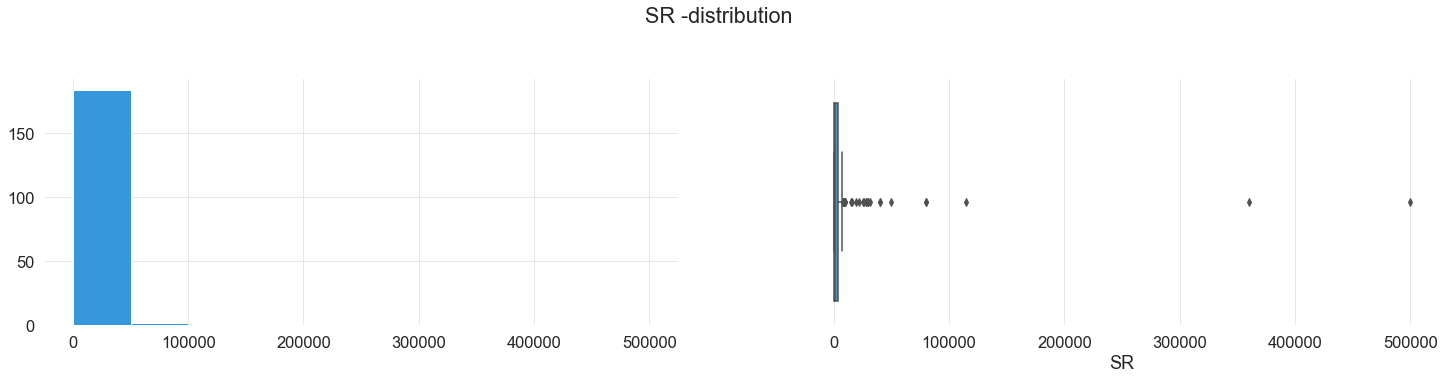

In [64]:
analyze_continuous_feature(df_input["SR"])

### 2. NR
Number of water reservoirs in habitat - Comment: The larger the number of reservoirs, the more likely it is that some of them will be suitable for amphibian breeding.

Null value count :  0

 count    189.000000
mean       1.566138
std        1.544419
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       12.000000
Name: NR, dtype: float64


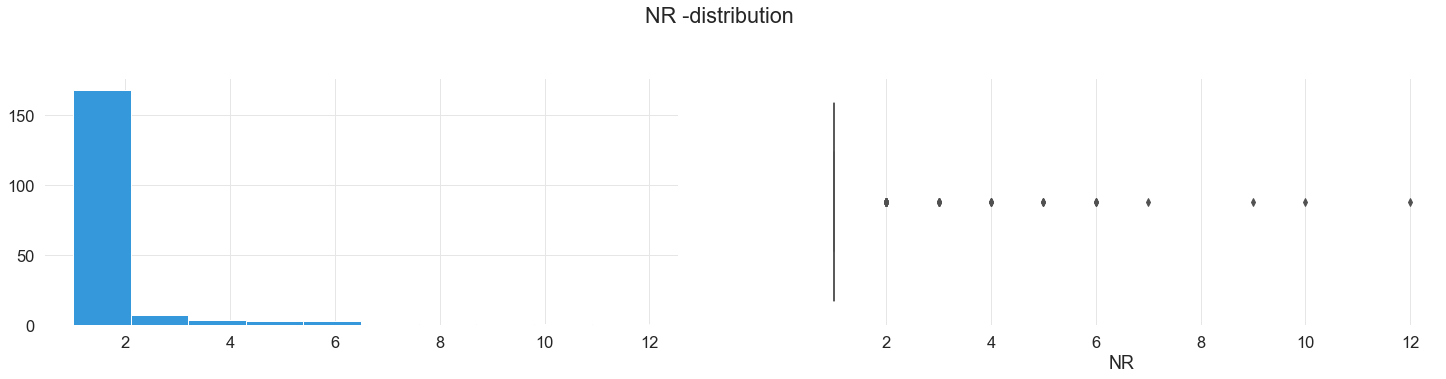

In [65]:
analyze_continuous_feature(df_input.NR)

### 3. TR
Type of water reservoirs:<br>
a. reservoirs with natural features that are natural or anthropogenic water reservoirs (e.g., subsidence post-exploited water reservoirs), not subjected to naturalization<br>
b. recently formed reservoirs, not subjected to naturalization<br>
c. settling ponds<br>
d. water reservoirs located near houses<br>
e. technological water reservoirs<br>
f. water reservoirs in allotment gardens<br>
g. trenches<br>
h. wet meadows, flood plains, marshes<br>
i. river valleys<br>
j. streams and very small watercourses<br>

Sample data:



2    1
3    5
4    5
5    5
6    1
Name: TR, dtype: int64


Null value count :  0

Unique values:  [1, 5, 12, 14, 15, 11, 2, 7]

 Unique values count:  8

Value counts:
    Value  Count
0      1    116
1     12     23
2     15     19
3      5     12
4     14     10
5     11      4
6      2      4
7      7      1


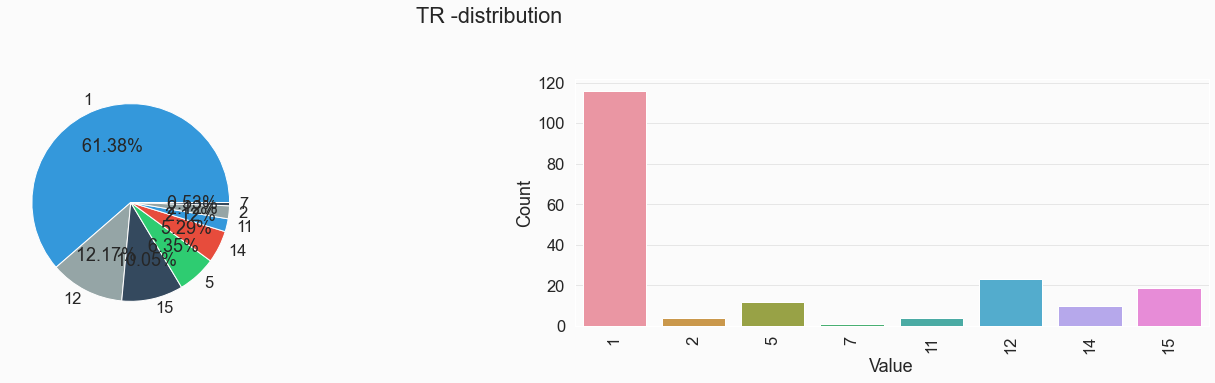

In [66]:
analyze_discrete_feature(df_input.TR)

### 4. VR
 Presence of vegetation within the reservoirs: <br>
a. no vegetation<br>
b. narrow patches at the edges<br>
c. areas heavily overgrown<br>
d. lush vegetation within the reservoir with some part devoid of vegetation<br>
e. reservoirs completely overgrown with a disappearing water table<br>
Comment: The vegetation in the reservoir favors amphibians, facilitates breeding, and allows the larvae to feed and give shelter. However, excess vegetation can lead to the overgrowth of the pond and water shortages.<br>

Sample data:



2    4
3    1
4    1
5    0
6    4
Name: VR, dtype: int64


Null value count :  0

Unique values:  [4, 1, 0, 2, 3]

 Unique values count:  5

Value counts:
    Value  Count
0      1     55
1      3     41
2      2     35
3      0     30
4      4     28


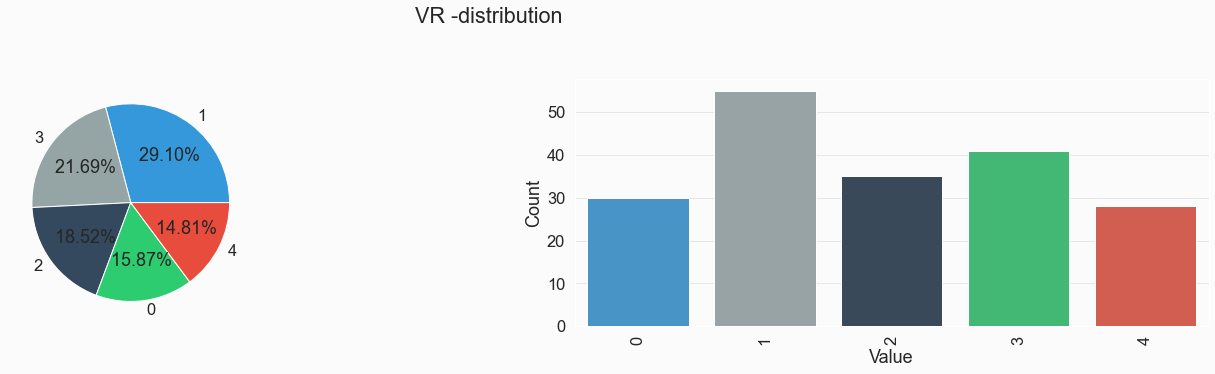

In [67]:
analyze_discrete_feature(df_input.VR)

### 5. SUR1
Surroundings 1 : the dominant types of land cover surrounding the water reservoir

Null value count :  0

 count    189.000000
mean       4.232804
std        3.434615
min        1.000000
25%        2.000000
50%        2.000000
75%        7.000000
max       14.000000
Name: SUR1, dtype: float64


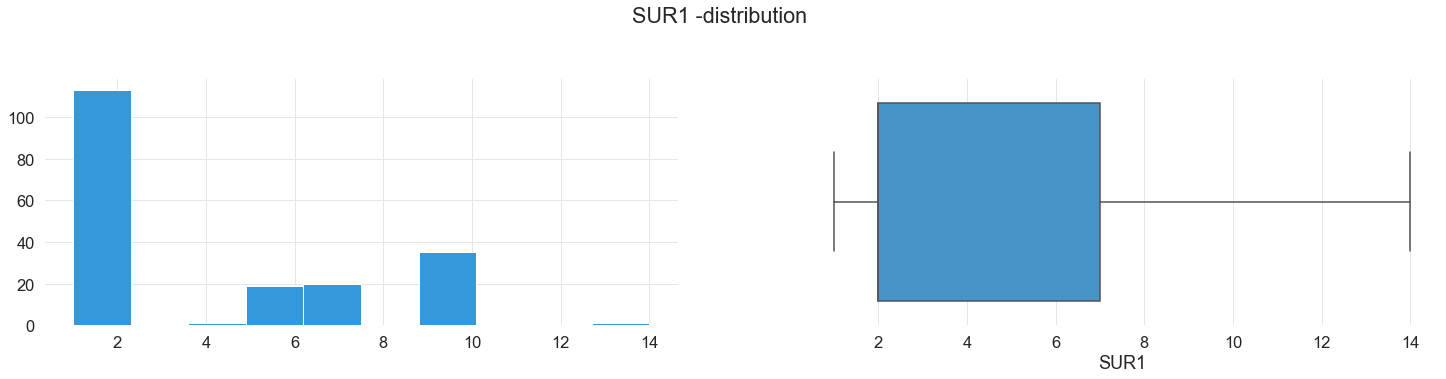

In [68]:
analyze_continuous_feature(df_input.SUR1)

### 6. SUR2
Surroundings 2: the second most dominant types of land cover surrounding the water reservoir

Null value count :  0

 count    189.000000
mean       5.391534
std        3.515185
min        1.000000
25%        2.000000
50%        6.000000
75%        9.000000
max       11.000000
Name: SUR2, dtype: float64


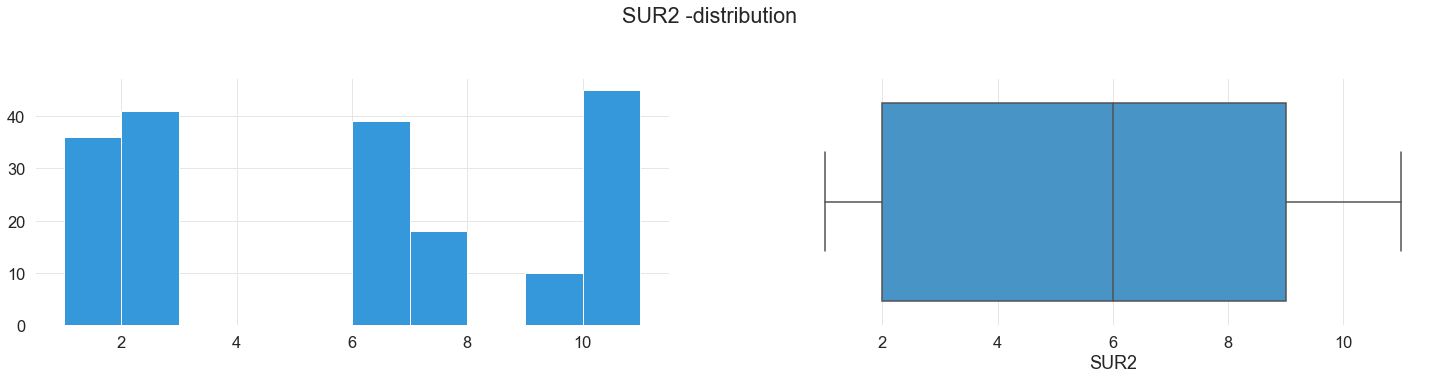

In [69]:
analyze_continuous_feature(df_input.SUR2)

### 7. SUR3
Surroundings 3: the third most dominant types of land cover surrounding the water reservoir<br>
Comment: The surroundings feature was designated in three stages. First, the dominant surroundings were selected. <br>
Then, two secondary types were chosen.<br>
a. forest areas (with meadows) and densely wooded areas<br>
b. areas of wasteland and meadows<br>
c. allotment gardens<br>
d. parks and green areas<br>
e. dense building development, industrial areas<br>
f. dispersed habitation, orchards, gardens<br>
g. river valleys<br>
h. roads, streets<br>
i. agricultural land<br>
The most valuable surroundings of water reservoirs for amphibians are areas with the least anthropopressure and proper moisture.<br>

Null value count :  0

 count    189.00000
mean       5.84127
std        3.29348
min        1.00000
25%        2.00000
50%        6.00000
75%        9.00000
max       11.00000
Name: SUR3, dtype: float64


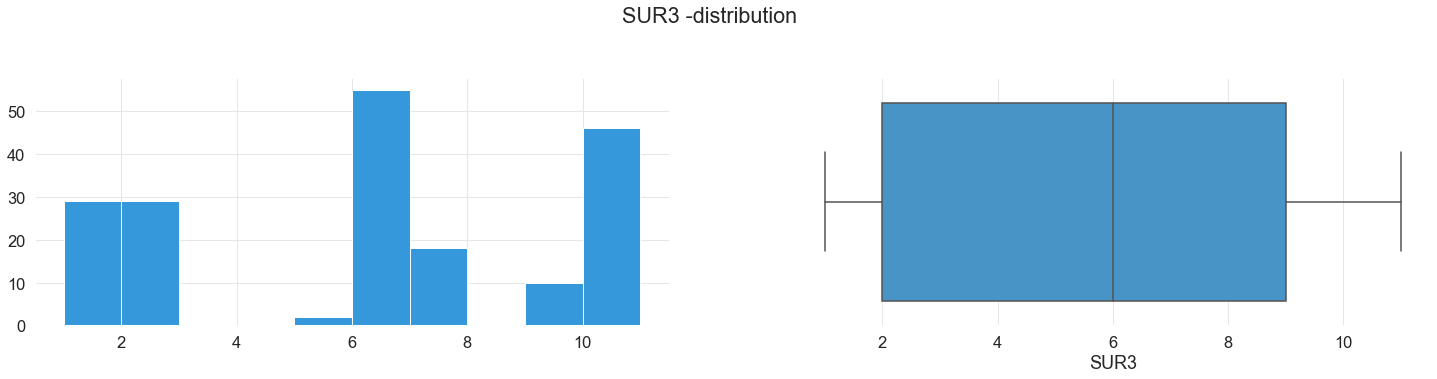

In [70]:
analyze_continuous_feature(df_input.SUR3)

### 8. UR
Use of water reservoirs:<br>
a. unused by man (very attractive for amphibians)<br>
b. recreational and scenic (care work is performed)<br>
c. used economically (often fish farming)<br>
d. technological<br>

Sample data:



2    0
3    3
4    3
5    3
6    0
Name: UR, dtype: int64


Null value count :  0

Unique values:  [0, 3, 1]

 Unique values count:  3

Value counts:
    Value  Count
0      0    130
1      3     50
2      1      9


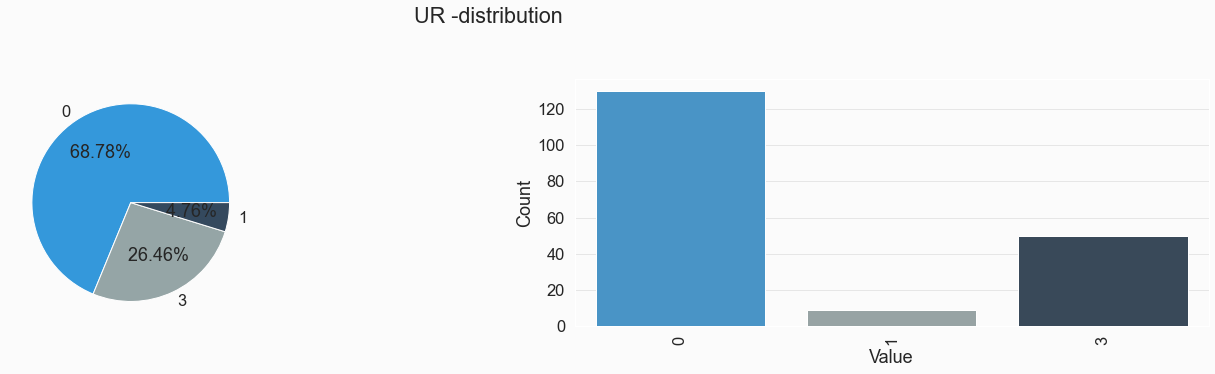

In [71]:
analyze_discrete_feature(df_input.UR)

### 9. FR
 The presence of fishing:<br>
a. lack of or occasional fishing<br>
b. intense fishing<br>
c. breeding reservoirs<br>
Comment: The presence of a large amount of fishing, in particular predatory and intense fishing, is not conducive to the presence of amphibians.<br>

Sample data:



2    0
3    1
4    4
5    4
6    0
Name: FR, dtype: int64


Null value count :  0

Unique values:  [0, 1, 4, 2, 3]

 Unique values count:  5

Value counts:
    Value  Count
0      0    125
1      3     18
2      1     16
3      4     15
4      2     15


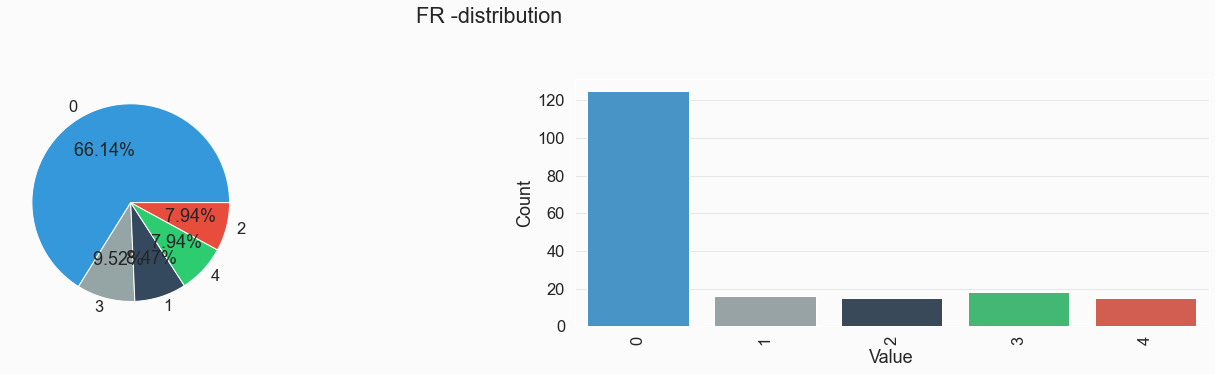

In [72]:
analyze_discrete_feature(df_input.FR)

### 10. OR
 Percentage access from the edges of the reservoir to undeveloped areas (the proposed percentage ranges are a numerical reflection of the phrases: lack of access, low access, medium access, large access to free space):<br>
a. 0 to 25% lack of access or poor access<br>
b. 25 to 50% low access<br>
c. 50 to 75% medium access,<br>
d. 75 to 100% large access to terrestrial habitats of the shoreline is in contact with the terrestrial habitat of amphibians.<br>

Null value count :  0

 count    189.000000
mean      89.962963
std       19.904926
min       25.000000
25%       99.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: OR, dtype: float64


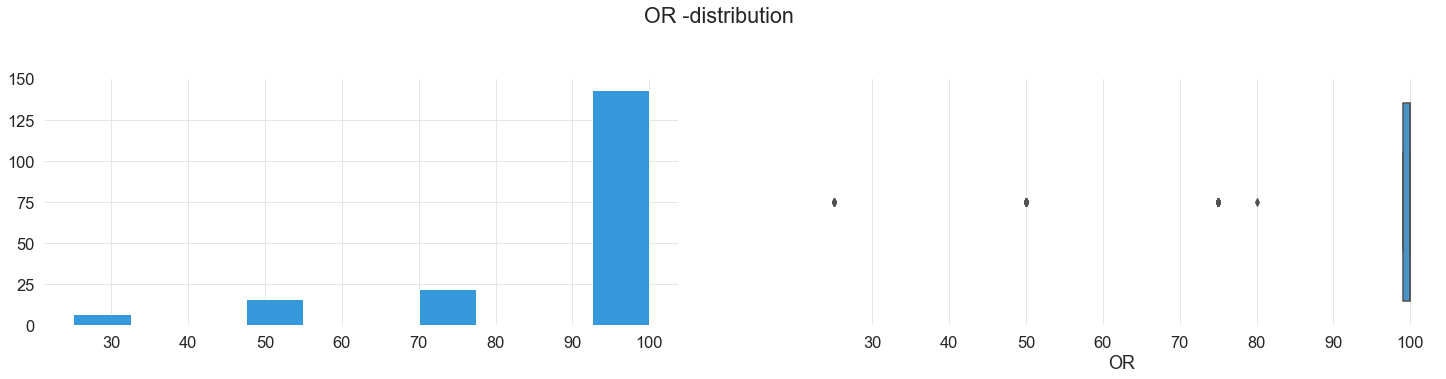

In [73]:
analyze_continuous_feature(df_input.OR)

### 11. RR
Minimum distance from the water reservoir to roads:<br>
a. <50 m<br>
b. 50 - 00 m<br>
c. 100 - 200 m<br>
d. 200 - 500 m<br>
e. 500 - 1000 m<br>
f. >1000 m<br>
Comment: The greater the distance between the reservoir and the road, the more safety for amphibians.<br>

Null value count :  0

 count    189.000000
mean       2.333333
std        2.520132
min        0.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: RR, dtype: float64


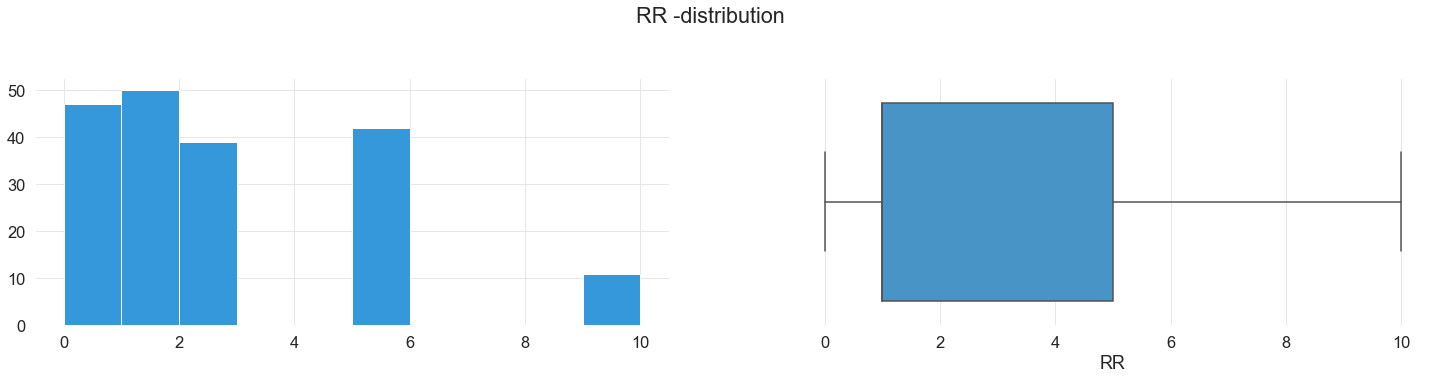

In [74]:
analyze_continuous_feature(df_input.RR)

### 12. BR
Building development - Minimum distance to buildings: <br>
a. <50 m <br>
b. 50 - 100 m<br>
c. 100 - 200 m<br>
d. 200 - 500 m<br>
e. 500 - 1000 m<br>
f. >1000 m<br>
Comment: The more distant the buildings, the more favorable the conditions for the occurrence of amphibians.<br>

Null value count :  0

 count    189.000000
mean       2.502646
std        2.640971
min        0.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: BR, dtype: float64


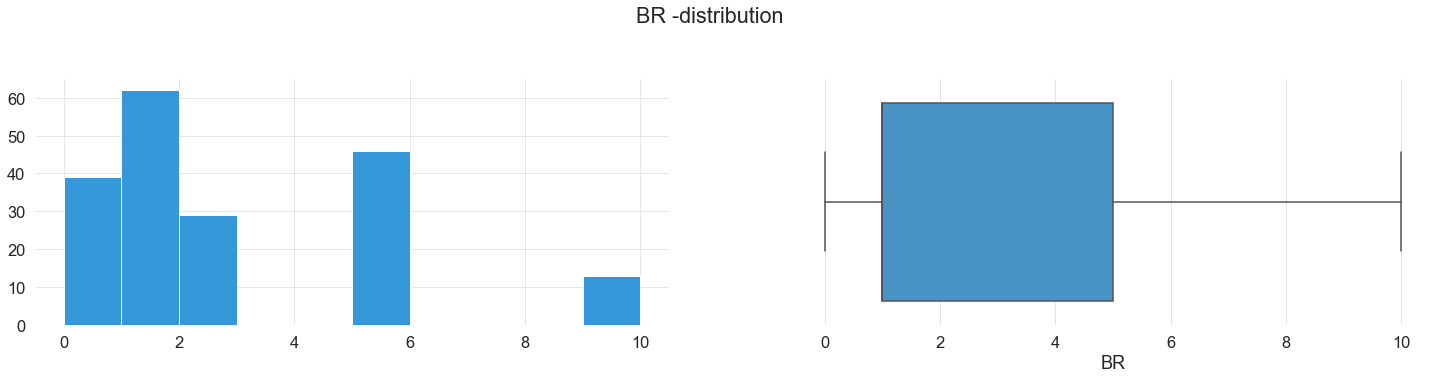

In [75]:
analyze_continuous_feature(df_input.BR)

### 13. MR
Maintenance status of the reservoir:<br>
a. Clean<br>
b. slightly littered<br>
c. reservoirs heavily or very heavily littered<br>
Comment: Trash causes devastation of the reservoir ecosystem. Backfilling and leveling of water reservoirs with ground and debris should also be considered.<br>

Sample data:



2    0
3    0
4    0
5    0
6    0
Name: MR, dtype: int64


Null value count :  0

Unique values:  [0, 2, 1]

 Unique values count:  3

Value counts:
    Value  Count
0      0    184
1      2      4
2      1      1


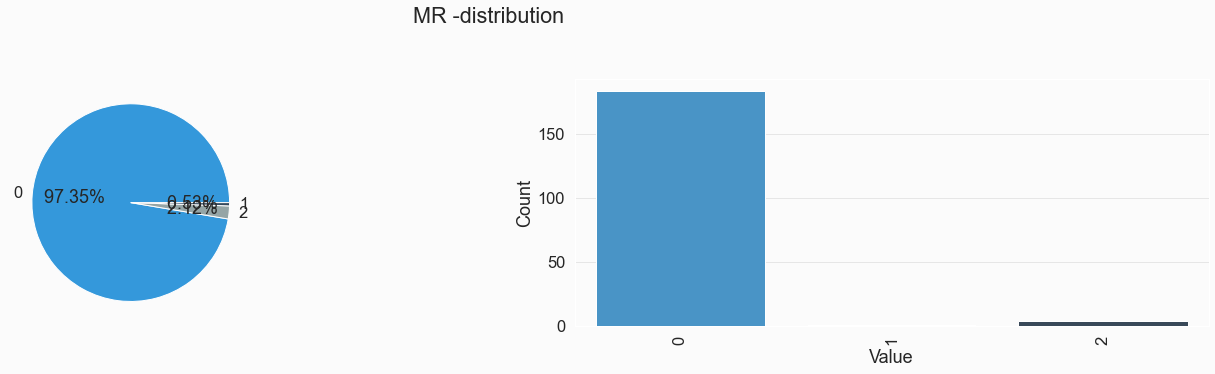

In [76]:
analyze_discrete_feature(df_input.MR)

### 14. CR
Type of shore <br>
a. Natural<br>
b. Concrete<br>
Comment: A concrete shore of a reservoir is not attractive for amphibians. A vertical concrete shore is usually a barrier for amphibians when they try to leave the water.<br>
17) Label 1 â€“ the presence of Green frogs<br>
18) Label 2 â€“ the presence of Brown frogs<br>
19) Label 3 â€“ the presence of Common toad<br>
20) Label 4 â€“ the presence of Fire-bellied toad<br>
21) Label 5 â€“ the presence of Tree frog<br>
22) Label 6 â€“ the presence of Common newt<br>
23) Label 7 â€“ the presence of Great crested newt<br>

Sample data:



2    1
3    1
4    1
5    1
6    1
Name: CR, dtype: int64


Null value count :  0

Unique values:  [1, 2]

 Unique values count:  2

Value counts:
    Value  Count
0      1    186
1      2      3


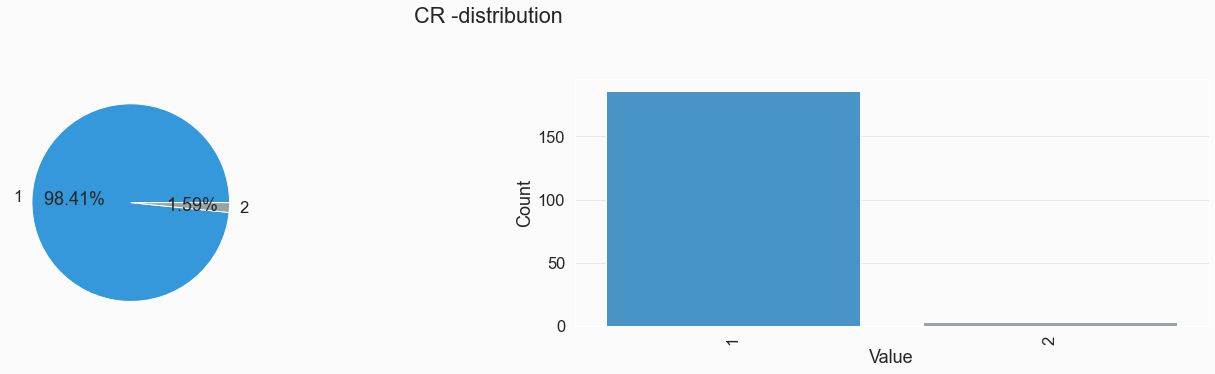

In [77]:
analyze_discrete_feature(df_input.CR)

Create one column which will summarize the presence of amphibians

In [78]:
# Get the target features
amphibian_presence=df_input.loc[:,['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']]

amphibian_presence.head(2)

1,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
2,0,0,0,0,0,0,0
3,0,1,1,0,0,1,0


In [79]:
def get_target_codes(field,code_label):
    '''
        field will be the type of Series
        code_label - is the input label for amphibians 
    '''
    if field == 1:
        return code_label
    else: 
        return ''
    

In [80]:
'''
Green frogs : G
Brown frogs : B
Common toad : C
Fire-belled toad : F
Tree frog : T
Common newt : N
Great crested newt : A
'''
for fld_name in amphibian_presence.columns:
    code_label = ""
    
    if fld_name == 'Green frogs':
        code_label = 'G'
    elif fld_name == 'Brown frogs':
        code_label = 'B'
    elif fld_name == 'Common toad':
        code_label = 'C'
    elif fld_name == 'Fire-bellied toad':
        code_label = 'F'
    elif fld_name == 'Tree frog':
        code_label = 'T'
    elif fld_name == 'Common newt':
        code_label = 'N'
    elif fld_name == 'Great crested newt':
        code_label = 'A'
    
    amphibian_presence[fld_name]=amphibian_presence[fld_name].apply(get_target_codes, args=(code_label))

In [81]:
amphibian_presence.head(5)

1,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
2,,,,,,,
3,,B,C,,,N,
4,,B,C,,,N,
5,,,C,,,,
6,,B,C,F,,N,A


In [82]:
def get_summary_code(row):
    '''
    input will be row of the dataframe
    Concatenates all the string values and returns one result value per row.
    '''
    result = "" # represents absence of amphibians
    for val in row:
        result = result + val
        
    if result == "":
        result = "X"
        
    return result

In [83]:
result = amphibian_presence.apply(get_summary_code,axis = 1)

In [84]:
# Unique values in Amphibian labels
result.unique()

array(['X', 'BCN', 'C', 'BCFNA', 'GBF', 'BC', 'G', 'GC', 'GBC', 'GBCFT',
       'BCT', 'GBCF', 'GCT', 'GCN', 'GN', 'GBCT', 'B', 'FTA', 'GBCNA',
       'BT', 'T', 'GB', 'F', 'CTA', 'GFT', 'CFT', 'CT', 'GF', 'GBFN',
       'GBTN', 'GBCTA', 'BN', 'GBCFTN', 'GBCTN', 'FT', 'GBCTNA', 'GBCFN',
       'GBCN', 'GBCFTNA', 'BCF', 'BF', 'BCFTNA', 'GT'], dtype=object)

In [85]:
# Assign amphibian labels to main dataframe
df_input["target"] = result

df_input.head()

1,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,...,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt,target
2,600,1,1,4,6,2,10,0,0,50,...,0,1,0,0,0,0,0,0,0,X
3,700,1,5,1,10,6,10,3,1,75,...,0,1,0,1,1,0,0,1,0,BCN
4,200,1,5,1,10,6,10,3,4,75,...,0,1,0,1,1,0,0,1,0,BCN
5,300,1,5,0,6,10,2,3,4,25,...,0,1,0,0,1,0,0,0,0,C
6,600,2,1,4,10,2,6,0,0,99,...,0,1,0,1,1,1,0,1,1,BCFNA


In [86]:
# Remove origian amphibian features from dataframe
df_input.drop(['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt'],axis=1,inplace=True)

df_input.head()

1,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,target
2,600,1,1,4,6,2,10,0,0,50,0,0,0,1,X
3,700,1,5,1,10,6,10,3,1,75,1,1,0,1,BCN
4,200,1,5,1,10,6,10,3,4,75,1,1,0,1,BCN
5,300,1,5,0,6,10,2,3,4,25,0,0,0,1,C
6,600,2,1,4,10,2,6,0,0,99,0,5,0,1,BCFNA


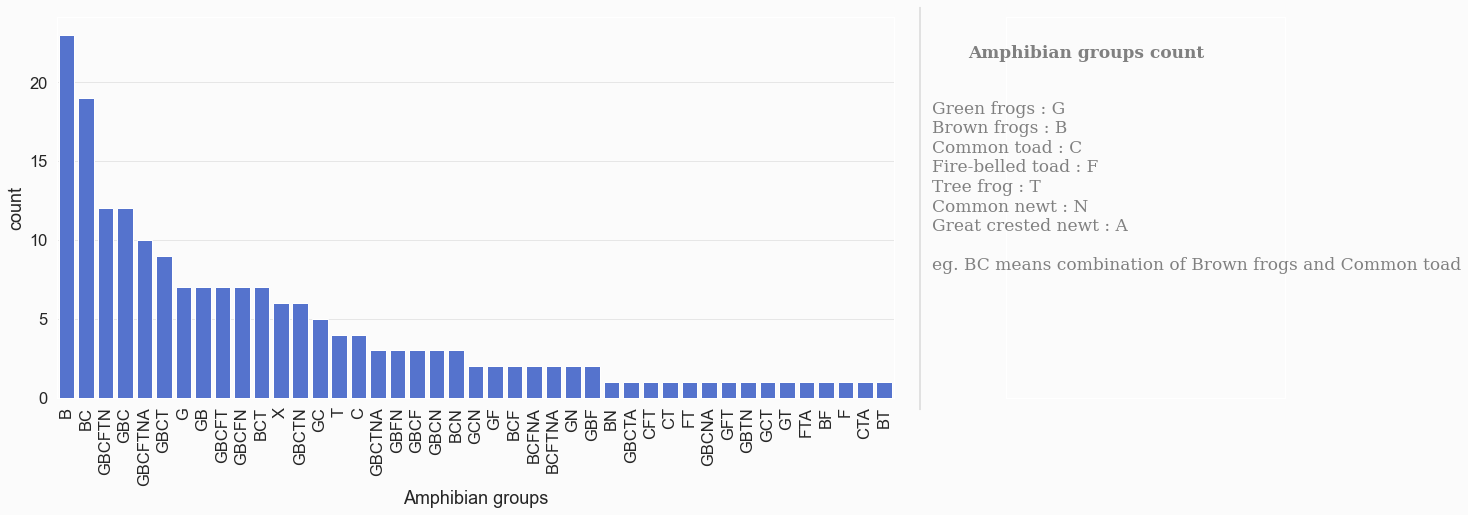

In [171]:
# Visualize the distribution of amphibian groups

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3,1]},figsize=(22,7))

ax[1].grid(False)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax[0].set_facecolor(background_color)
ax[1].set_facecolor(background_color)

sns.countplot(data=df_input,x="target",ax=ax[0],order=df_input['target'].value_counts().index,color='royalblue')
ax[0].set_xlabel("Amphibian groups")
# rotate x labels
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
    
#Draw line in the middle    
l1= lines.Line2D([0.67,0.67],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#Description
fig.text(x=0.7,
        y=0.8,
        s="Amphibian groups count",
        fontweight='bold',
        fontfamily='serif',
         fontsize=17,
        color='grey')
fig.text(x=0.65,
        y=0.3,
        fontweight='light',
        fontfamily='serif',
         fontsize=17,
        color='grey',
        s='''
        Green frogs : G
        Brown frogs : B
        Common toad : C
        Fire-belled toad : F
        Tree frog : T
        Common newt : N
        Great crested newt : A \n
        eg. BC means combination of Brown frogs and Common toad
        
        ''')

plt.show()

In [173]:
df_input.to_csv('tableau_data.csv')

In [37]:
le = LabelEncoder()

In [48]:
df_input['target']=le.fit_transform(df_input.target)

In [50]:
# Mapping for label and encoded value
dict(zip(le.classes_,le.transform(le.classes_)))

{'B': 0,
 'BC': 1,
 'BCF': 2,
 'BCFNA': 3,
 'BCFTNA': 4,
 'BCN': 5,
 'BCT': 6,
 'BF': 7,
 'BN': 8,
 'BT': 9,
 'C': 10,
 'CFT': 11,
 'CT': 12,
 'CTA': 13,
 'F': 14,
 'FT': 15,
 'FTA': 16,
 'G': 17,
 'GB': 18,
 'GBC': 19,
 'GBCF': 20,
 'GBCFN': 21,
 'GBCFT': 22,
 'GBCFTN': 23,
 'GBCFTNA': 24,
 'GBCN': 25,
 'GBCNA': 26,
 'GBCT': 27,
 'GBCTA': 28,
 'GBCTN': 29,
 'GBCTNA': 30,
 'GBF': 31,
 'GBFN': 32,
 'GBTN': 33,
 'GC': 34,
 'GCN': 35,
 'GCT': 36,
 'GF': 37,
 'GFT': 38,
 'GN': 39,
 'GT': 40,
 'T': 41,
 'X': 42}

In [51]:
df_input

1,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,target
2,600,1,1,4,6,2,10,0,0,50,0,0,0,1,42
3,700,1,5,1,10,6,10,3,1,75,1,1,0,1,5
4,200,1,5,1,10,6,10,3,4,75,1,1,0,1,5
5,300,1,5,0,6,10,2,3,4,25,0,0,0,1,10
6,600,2,1,4,10,2,6,0,0,99,0,5,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2300,1,12,3,2,2,1,0,0,75,2,1,0,1,0
187,300,1,14,2,7,10,2,0,0,100,5,5,0,1,21
188,500,1,1,4,1,10,2,0,0,100,5,5,0,1,21
189,300,1,12,3,2,1,6,0,0,100,1,0,0,1,1
